# Top Spotify Songs (2010-2019) Outlier Analysis

### Data Description

Each row represents an individual song as it appeared in the Billboard end of the year chart. Data collected by Leonardo Henrique on Kaggle.

[Link to data source](https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year?resource=download)

### Column Descriptions

**Track Metadata**
| name | description |
| --- | --- |
| title | Song title |
| artist | Song artist |
| top genre | Song genre category |
| year | Song Billboard chart entry year |

**Audio Quantitive Data**
| name | description |
| --- | --- |
| db | Loudness - How loud a song is (db/decibels) |
| dur | Duration - How long the song is (seconds) |
| bpm |  Tempo - How fast a song is (bpm/beats per minute) |

**Audio Qualitative Data**
| name | description |
| --- | --- |
| nrgy | Energy level - How energetic the song is |
| dnce | Dancability - How easy it is to dance to |
| live | Liveness - How likely a song is to a be a live recording |
| val | Valence - How positive the mood of the song is |
| acous | Acousticness - How accoustic sounding the song is |
| spch | Speechiness - How much of a song is spoken word |
| pop | Popularity - How popular a song is (as of time of data collection) |

## Load Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load pandas dataframe
df = pd.read_csv('./top10s.csv', encoding='ISO-8859-1')

# Drop id column
df = df.iloc[:,1:]

df.head(10)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


## Data Exploration

In [61]:
# Number of observations
df.shape

(603, 14)

In [62]:
# Data distribution and scales (minmums and maximums)
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [63]:
# Check for missing data
df.isnull().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [64]:
# Pairplot and data distributions
# sns.pairplot(df)

<AxesSubplot: >

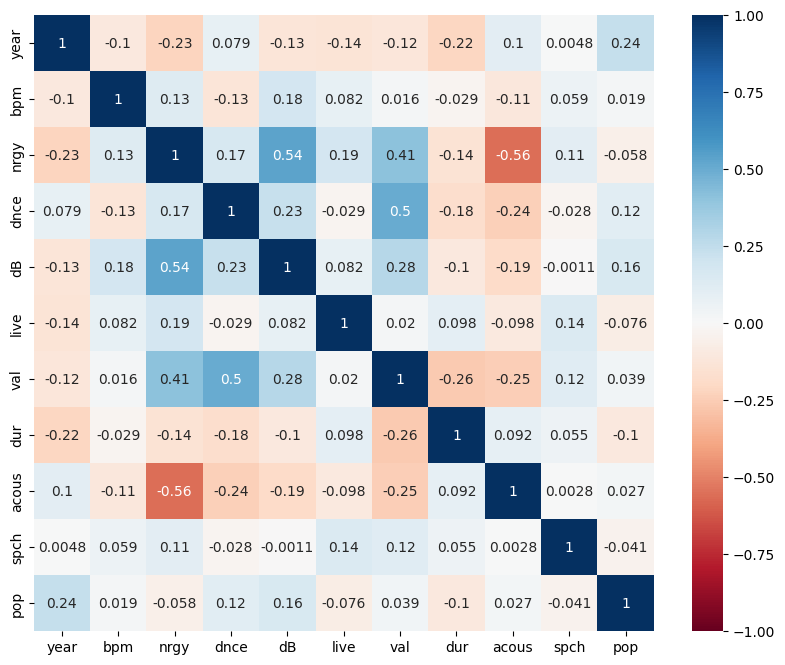

In [65]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu', ax=ax)

## Data Preprocessing

In [3]:
# Normalize our data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
metadata = ['title', 'artist', 'top genre', 'year']
normdf = pd.DataFrame(scaler.fit_transform(df.drop(columns=metadata)), columns = df.drop(columns=metadata).columns)
normdf

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333,0.838384
1,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167,0.828283
2,0.582524,0.857143,0.783505,0.982759,0.391892,0.724490,0.227586,0.101010,0.291667,0.808081
3,0.577670,0.938776,0.721649,0.965517,0.108108,0.724490,0.555172,0.000000,0.083333,0.797980
4,0.529126,0.857143,0.659794,0.948276,0.121622,0.438776,0.300000,0.020202,0.083333,0.787879
...,...,...,...,...,...,...,...,...,...,...
598,0.504854,0.673469,0.628866,0.913793,0.270270,0.163265,0.144828,0.010101,0.062500,0.757576
599,0.461165,0.806122,0.773196,0.931034,0.094595,0.622449,0.248276,0.212121,0.250000,0.757576
600,0.660194,0.775510,0.546392,0.948276,0.121622,0.663265,0.434483,0.070707,0.708333,0.707071
601,0.553398,0.806122,0.618557,0.931034,0.567568,0.244898,0.286207,0.010101,0.145833,0.696970


In [4]:
# Apply PCA to our numerical data
from sklearn import decomposition

pca = decomposition.PCA(n_components=5) # Reduce number of columns to 5
pca.fit(normdf)
normdf = pd.DataFrame(pca.transform(normdf))
normdf

,0,1,2,3,4
0,-0.234816,-0.242389,-0.085571,-0.061437,-0.047112
1,-0.205307,0.087620,0.521754,-0.115194,-0.189543
2,-0.278370,-0.042280,0.153561,-0.077885,-0.143808
3,-0.268153,-0.025596,-0.155317,-0.010889,-0.044690
4,-0.043821,0.084061,-0.219651,-0.028127,-0.082046
...,...,...,...,...,...
598,0.194441,0.245050,-0.198174,-0.130714,-0.082141
599,-0.084858,-0.186301,-0.047918,0.061897,-0.082140
600,-0.137504,-0.002697,0.186872,0.456663,-0.284962
601,0.063805,0.397949,0.095256,-0.178959,-0.040824


In [5]:
# Put back metadata columns with value replacement
metadata_dict = {}
for i in metadata:
    dict = {}
    metadata_dict[i] = {}
    for j in range(len(df[i].unique())):
        dict[df[i].unique()[j]] = j
        metadata_dict[i][j] = df[i].unique()[j]
    normdf[i] = df[i].map(dict)
normdf

,0,1,2,3,4,title,artist,top genre,year
0,-0.234816,-0.242389,-0.085571,-0.061437,-0.047112,0,0,0,0
1,-0.205307,0.087620,0.521754,-0.115194,-0.189543,1,1,1,0
2,-0.278370,-0.042280,0.153561,-0.077885,-0.143808,2,2,2,0
3,-0.268153,-0.025596,-0.155317,-0.010889,-0.044690,3,3,2,0
4,-0.043821,0.084061,-0.219651,-0.028127,-0.082046,4,4,3,0
...,...,...,...,...,...,...,...,...,...
598,0.194441,0.245050,-0.198174,-0.130714,-0.082141,579,107,2,9
599,-0.084858,-0.186301,-0.047918,0.061897,-0.082140,580,105,3,9
600,-0.137504,-0.002697,0.186872,0.456663,-0.284962,581,153,2,9
601,0.063805,0.397949,0.095256,-0.178959,-0.040824,582,107,2,9


In [6]:
from kmodes.kprototypes import KPrototypes

# Track cost values for each iteration of K-Prototypes
costs = []

for cluster in range(1, 10):
    kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang')
    kprototype.fit(normdf.to_numpy(), categorical = [5,6,7,8])
    costs.append(kprototype.cost_)
    print(kprototype.cost_)

309.4865025793344
277.07165200324096
257.25205961319335
245.35359536921823
237.94912814551475
231.8723012731873
225.48134143774132
221.78805071467465
217.42338682990683


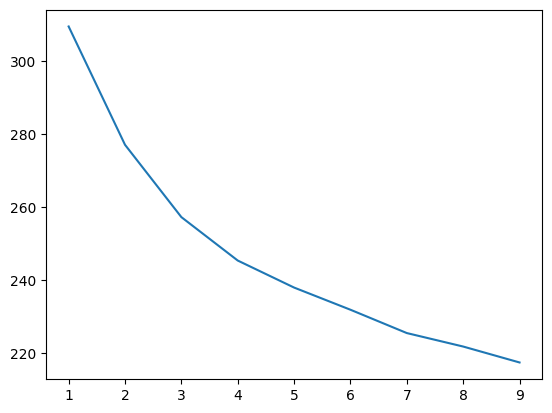

In [7]:
from matplotlib import pyplot as plt

plt.plot(range(1, len(costs) + 1), costs)
plt.show()

Using the elbow method, we would pick cluster 7 which is the "elbow" of the curve.

Before the point we have a curve starting from the beginning and after the point we have a linear line. The point where the graphical flow changes is at point 7. 

In [8]:
# Fit 7 cluster model
model = KPrototypes(n_jobs=-1, n_clusters=7, init='Huang')
model.fit(normdf.to_numpy(), categorical = [5,6,7,8])
model.cluster_centroids_

array([[-4.43446846e-02,  2.14947148e-02, -8.28613487e-02,
         1.47814644e-02,  1.07192115e-02,  2.74000000e+02,
         2.10000000e+01,  2.00000000e+00,  6.00000000e+00],
       [-8.93407821e-02, -1.70242739e-01, -4.57278961e-02,
        -7.11928787e-02, -5.67723557e-02,  4.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  9.00000000e+00],
       [-1.65671746e-02, -2.96073885e-02,  3.47601009e-01,
         3.21713190e-01, -1.68981713e-01,  4.80000000e+01,
         4.30000000e+01,  2.00000000e+00,  7.00000000e+00],
       [ 6.51321494e-01, -2.06591772e-01,  6.61979339e-02,
        -3.12296508e-02,  7.25177078e-02,  3.86000000e+02,
         3.20000000e+01,  2.00000000e+00,  5.00000000e+00],
       [-1.14864395e-01,  2.17767071e-01,  2.26039479e-01,
        -1.34712069e-01,  3.37262535e-02,  3.03000000e+02,
         3.00000000e+00,  2.00000000e+00,  3.00000000e+00],
       [-2.55969861e-01, -9.48336147e-02, -3.17531737e-02,
         2.41175480e-02,  5.88617966e-02,  4.600000

In [9]:
model.labels_

array([1, 4, 5, 5, 1, 0, 5, 6, 3, 1, 0, 1, 4, 5, 2, 4, 5, 4, 4, 5, 4, 6,
       5, 1, 4, 4, 5, 5, 0, 0, 5, 5, 4, 2, 0, 5, 3, 4, 4, 6, 2, 6, 4, 5,
       3, 4, 5, 5, 2, 5, 0, 3, 3, 4, 1, 0, 4, 1, 4, 1, 5, 5, 4, 4, 1, 6,
       6, 5, 4, 0, 6, 0, 0, 5, 6, 2, 6, 4, 0, 5, 5, 0, 4, 6, 5, 0, 4, 3,
       0, 5, 5, 5, 5, 5, 3, 2, 3, 2, 0, 5, 2, 4, 0, 2, 6, 1, 6, 1, 5, 1,
       1, 5, 0, 1, 5, 0, 5, 1, 4, 0, 0, 5, 6, 6, 0, 1, 0, 4, 5, 5, 0, 5,
       0, 6, 5, 1, 5, 1, 5, 5, 5, 6, 0, 5, 4, 4, 0, 5, 3, 6, 5, 4, 5, 5,
       6, 6, 5, 4, 6, 5, 5, 5, 5, 5, 5, 5, 4, 6, 4, 5, 6, 5, 6, 0, 5, 4,
       4, 1, 5, 4, 0, 4, 4, 4, 0, 4, 3, 2, 4, 5, 4, 5, 3, 6, 4, 5, 6, 4,
       5, 4, 2, 5, 5, 4, 5, 4, 5, 3, 5, 5, 3, 3, 5, 5, 1, 1, 0, 0, 1, 1,
       3, 5, 0, 0, 6, 0, 6, 1, 6, 4, 0, 5, 1, 6, 1, 2, 5, 0, 5, 0, 5, 2,
       0, 0, 0, 6, 6, 5, 6, 3, 6, 5, 0, 2, 5, 3, 6, 5, 4, 4, 3, 3, 4, 0,
       0, 0, 2, 4, 1, 3, 6, 2, 5, 3, 1, 0, 3, 6, 3, 1, 0, 5, 5, 0, 3, 4,
       6, 6, 4, 4, 5, 6, 4, 0, 0, 3, 2, 0, 0, 4, 5,

In [10]:
normdf['cluster label'] = model.labels_

In [11]:
def matching_dissim(a, b):
    return np.sum(a != b)

def euclidean_dissim(a, b):
    return np.sum((a - b) ** 2)

# Split data into numerical and categorical 
num = normdf.to_numpy()[:,0:5]
cat = normdf.to_numpy()[:,5:9]

# Set weight to half of the mean standard deviation of the numerical data
gamma = 0.5 * np.mean(num.std(axis=0))

centroids = model.cluster_centroids_
labels = model.labels_

costs = []

# Sum costs to verify that our custom cost function implementation works
for i in range(len(normdf)):
    num_cost = euclidean_dissim(num[i], centroids[labels[i]][0:5])
    cat_cost = matching_dissim(cat[i], centroids[labels[i]][5:9])

    costs.append(num_cost + gamma * cat_cost)

print(f'total : {np.sum(costs)}')
print(f'cost (from model): {model.cost_}')

total : 226.67926428067665
cost (from model): 226.67926428067665


This matches!

In [14]:
# Add costs to dataframe
normdf['cluster cost'] = costs

# Remap the metadata
for i in metadata:
    normdf[i] = normdf[i].map(metadata_dict[i])
normdf

,0,1,2,3,4,title,artist,top genre,year,cluster label,cluster cost
0,-0.234816,-0.242389,-0.085571,-0.061437,-0.047112,"Hey, Soul Sister",Train,neo mellow,2010,1,0.413507
1,-0.205307,0.087620,0.521754,-0.115194,-0.189543,Love The Way You Lie,Eminem,detroit hip hop,2010,4,0.548158
2,-0.278370,-0.042280,0.153561,-0.077885,-0.143808,TiK ToK,Kesha,dance pop,2010,5,0.378107
3,-0.268153,-0.025596,-0.155317,-0.010889,-0.044690,Bad Romance,Lady Gaga,dance pop,2010,5,0.321181
4,-0.043821,0.084061,-0.219651,-0.028127,-0.082046,Just the Way You Are,Bruno Mars,pop,2010,1,0.195826
...,...,...,...,...,...,...,...,...,...,...,...
598,0.194441,0.245050,-0.198174,-0.130714,-0.082141,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,6,0.321668
599,-0.084858,-0.186301,-0.047918,0.061897,-0.082140,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,1,0.211321
600,-0.137504,-0.002697,0.186872,0.456663,-0.284962,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,2,0.361869
601,0.063805,0.397949,0.095256,-0.178959,-0.040824,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,4,0.378031


In [15]:
# Find top 10 highest cost rows
normdf.nlargest(10, ['cluster cost'])

,0,1,2,3,4,title,artist,top genre,year,cluster label,cluster cost
442,0.895049,0.278850,-0.322942,0.371045,0.666336,Million Years Ago,Adele,british soul,2016,3,1.249954
559,0.403632,-0.180299,0.942384,-0.128092,0.018125,Walk On Water (feat. Beyoncé),Eminem,detroit hip hop,2018,2,1.175739
271,0.462434,-0.431517,0.734323,0.286788,-0.398771,Love Yourself,Justin Bieber,canadian pop,2015,2,0.979914
364,0.462434,-0.431517,0.734323,0.286788,-0.398771,Love Yourself,Justin Bieber,canadian pop,2016,2,0.979914
50,-0.143945,0.238278,-0.121866,0.297276,0.575608,Hello,Martin Solveig,big room,2010,0,0.842702
63,0.197809,0.673572,0.476217,-0.168970,-0.179468,Monster,Kanye West,chicago rap,2011,4,0.800100
267,0.117702,0.205607,0.313022,0.118844,0.642605,Not a Bad Thing,Justin Timberlake,dance pop,2014,4,0.785847
138,-0.299879,0.178605,0.117679,0.220754,0.644088,Blow Me (One Last Kiss),P!nk,dance pop,2012,5,0.769205
572,0.480809,-0.700198,0.114963,-0.241937,-0.163530,Memories,Maroon 5,pop,2019,3,0.760579
42,0.175549,0.712018,0.398940,-0.147009,-0.020685,Hard,Rihanna,barbadian pop,2010,4,0.746994
